## COVID-19 Forecasting using Facebook's Prophet Library
In this notebook, we will use the Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE and Facebook's Prophet Library to forcast the spread of COVID-19.
## Installating of importing required libraries

In [294]:
#!pip install fbprophet

In [295]:
# importing libraries : 

import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
%matplotlib inline
#You can safely disable the warning with the following assignment.
pd.options.mode.chained_assignment = None
plt.style.use('fivethirtyeight')

### Downloading COVID-19 DataSet

In [296]:
!curl https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv > time_series_19-covid-Recovered.csv
!curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv > time_series_19-covid-Deaths.csv
!curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv > time_series_19-covid-Confirmed.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17160    0 17160    0     0  16421      0 --:--:--  0:00:01 --:--:-- 16421
100  761k    0  761k    0     0   519k      0 --:--:--  0:00:01 --:--:--  519k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 33 62371   33 20565    0     0  41798      0  0:00:01 --:--:--  0:00:01 41713
100 62371  100 62371    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:

In [297]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv')
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,...,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,32.472246,-38.240308,1.255656,1.477376,2.128959,3.244344,4.791855,6.622172,12.619910,13.950226,...,221.452489,230.280543,239.414027,248.404977,256.925339,268.307692,284.762443,290.368778,328.490950,353.171946
std,18.243160,80.488626,21.171051,21.257000,26.477289,36.865436,51.533686,69.443788,170.220759,171.323903,...,3231.736307,3245.454795,3259.270219,3272.375630,3287.815469,3300.662870,3327.040627,3334.956867,3408.758787,3472.648781
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.517325,-94.614125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.194900,-75.247900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,42.328900,18.981425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,4.000000,6.000000,7.000000,8.750000,11.750000,17.000000,25.750000,30.750000
max,64.963100,174.886000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000,67790.000000


## Data Preparation

The input to Prophet library is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.
So let's check the type of our columns and change it to datetime if necessary.

In [298]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20'],
      dtype='object')

### Unpivoting the DataFrame using melt() Method
As the dates are used as column values in the dataset, we need to unpivoting the dataframe using **melt()** method to obtain the date as value 

In [299]:
df_unpivoted = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Datetime', value_name='Confirmed')
df_unpivoted.tail()


,Province/State,Country/Region,Lat,Long,Datetime,Confirmed
23421,NaN,Saint Lucia,13.9094,-60.9789,3/14/20,1
23422,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,3/14/20,1
23423,NaN,Suriname,3.9193,-56.0278,3/14/20,1
23424,"Virgin Islands, U.S.",US,18.3358,-64.8963,3/14/20,1
23425,NaN,occupied Palestinian territory,31.9522,35.2332,3/14/20,0


In [300]:
df_train=df_unpivoted[['Country/Region','Datetime','Confirmed']]
df_train

,Country/Region,Datetime,Confirmed
0,Thailand,1/22/20,2
1,Japan,1/22/20,2
2,Singapore,1/22/20,0
3,Nepal,1/22/20,0
4,Malaysia,1/22/20,0
...,...,...,...
23421,Saint Lucia,3/14/20,1
23422,Saint Vincent and the Grenadines,3/14/20,1
23423,Suriname,3/14/20,1
23424,US,3/14/20,1


In [301]:

# Since the month is in object we have to change it to datetime type : 
df_train['Datetime'] = pd.DatetimeIndex(df_train['Datetime'].copy())
df_train.dtypes

Country/Region            object
Datetime          datetime64[ns]
Confirmed                  int64
dtype: object

#### Important: Now the month is in datetime 64. Prophet also requires naming the input column as ds (the time column) and y (the metric column). So we have to rename the columns:

In [302]:
df = df_train.rename(columns = {'Datetime' : 'ds',
                         'Confirmed' : 'y'})
df.head()

,Country/Region,ds,y
0,Thailand,2020-01-22,2
1,Japan,2020-01-22,2
2,Singapore,2020-01-22,0
3,Nepal,2020-01-22,0
4,Malaysia,2020-01-22,0


Now exploring the dataset by doing a line plot :

In [303]:
pd.plotting.register_matplotlib_converters() 
# This is done because Prophet deregisters the pandas converters in its code. The code in the line 
# above reregisters the converters that comes with register(). This problem affects Jupyter Notebook
# and Google Colab

In [304]:
 
country = 'Tunisia'
covid_train = df.loc[lambda df: df["Country/Region"] == country].copy()
covid_test = df.loc[lambda df: df["Country/Region"] == country].copy()
covid_train.count()

Country/Region    53
ds                53
y                 53
dtype: int64

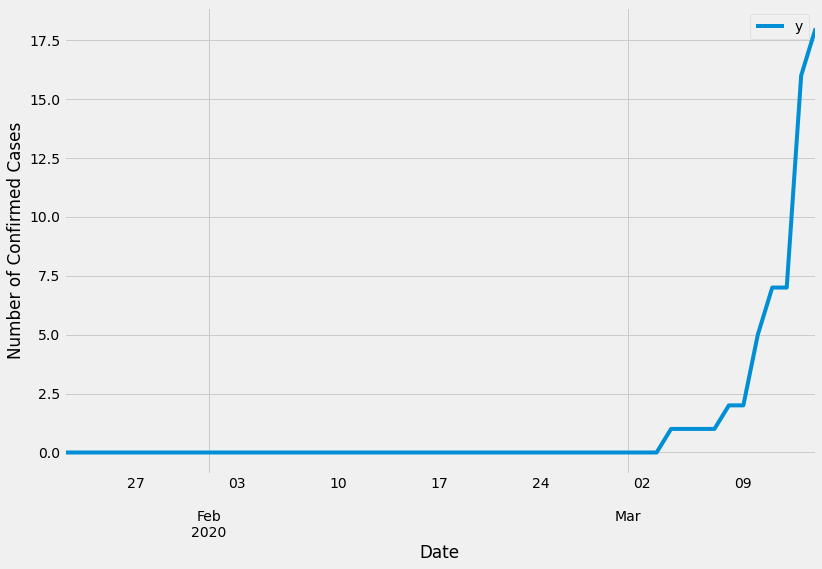

In [305]:

ax = covid_train.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Number of Confirmed Cases')
ax.set_xlabel('Date')

plt.show()


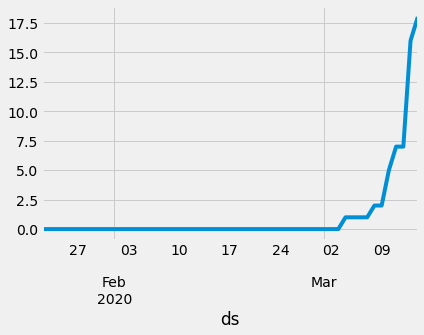

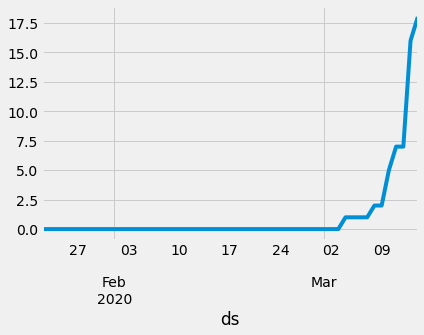

In [306]:
covid_train.set_index('ds').y.plot().figure

The authors of Prophet have abstracted away many of the inherent complexities of time series forecasting and made it more intuitive for analysts and developers alike to work with time series data.

To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [307]:
# The default uncertainity level of Prophet is 80%. Setting it to 95%

covid_model = Prophet(interval_width = 0.95, weekly_seasonality=True, daily_seasonality=True,yearly_seasonality=False)

Now that the prophet model has been initialized we can call its fit method with our DataFrame as input. 

In [308]:
covid_model.fit(covid_train)

In [309]:
# Predict on training set with model
covid_model_predict = covid_model.predict(df=covid_italy.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

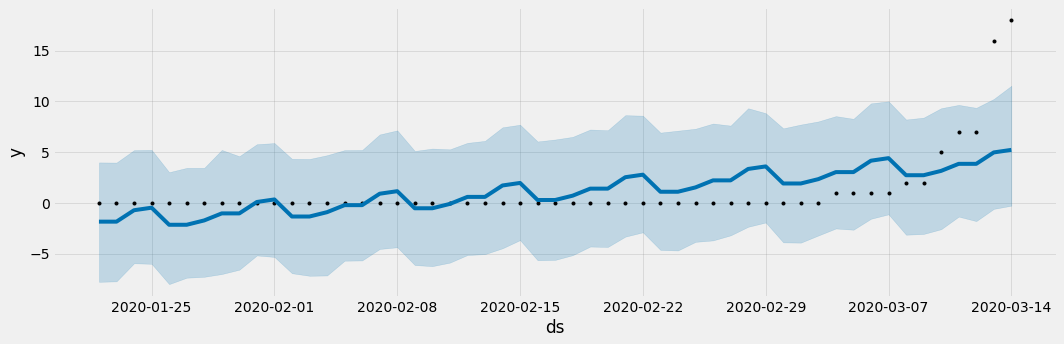

In [310]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = covid_model.plot(covid_model_predict,
                 ax=ax)
plt.show()


In [311]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [312]:
cmp_df = make_comparison_dataframe(covid_test, covid_model_predict)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,Country/Region,y
ds,,,,,
2020-03-12,3.849523,-1.791828,9.368150,Tunisia,7
2020-03-13,4.974657,-0.587723,10.240609,Tunisia,16
2020-03-14,5.224798,-0.274434,11.542228,Tunisia,18


In [322]:
def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Convid-19'), title=title, showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, 53, 100, 'New Infection of Convid-19')

#### Note: In order to obtain forecasts of our time series we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame as Prophet provides the make_future_dataframe helper function to do that

In [314]:
 
future_dates = covid_model.make_future_dataframe(periods = 7, freq = 'd',)
future_dates.tail()

,ds
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21


When working with Prophet it is important to consider the frequency of the time series. As we are working with monthly data, we clearly specified the desired frequency of our timestamps (in this case 'MS' is start of each month). Therefore, the make_future_dataframe generated 36 monthly timestamps for us. In other words, we're predicting values 3 years into the future 

In [315]:
forecast = covid_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2020-03-17,3.971450,-2.013826,9.590938
56,2020-03-18,4.663962,-1.179739,10.288309
57,2020-03-19,4.664102,-1.657704,10.587046
58,2020-03-20,5.789236,-0.151565,11.582833
59,2020-03-21,6.039376,0.516253,11.527811


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

1. ds: the datestamp of the forecasted value

2. yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)

3. yhat_lower: the lower bound of our forecasts

4. yhat_upper: the upper bound of our forecasts

In [316]:
# To view everything provided by prophet in predictions : 
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2020-03-17,6.282480,-2.013826,9.590938,6.282418,6.282537,-2.311030,-2.311030,-2.311030,-1.796922,-1.796922,-1.796922,-0.514108,-0.514108,-0.514108,0.0,0.0,0.0,3.971450
56,2020-03-18,6.398848,-1.179739,10.288309,6.398760,6.398934,-1.734886,-1.734886,-1.734886,-1.796922,-1.796922,-1.796922,0.062035,0.062035,0.062035,0.0,0.0,0.0,4.663962
57,2020-03-19,6.515217,-1.657704,10.587046,6.515103,6.515327,-1.851115,-1.851115,-1.851115,-1.796922,-1.796922,-1.796922,-0.054193,-0.054193,-0.054193,0.0,0.0,0.0,4.664102
58,2020-03-20,6.631585,-0.151565,11.582833,6.631438,6.631725,-0.842349,-0.842349,-0.842349,-1.796922,-1.796922,-1.796922,0.954572,0.954572,0.954572,0.0,0.0,0.0,5.789236
59,2020-03-21,6.747953,0.516253,11.527811,6.747773,6.748150,-0.708577,-0.708577,-0.708577,-1.796922,-1.796922,-1.796922,1.088345,1.088345,1.088345,0.0,0.0,0.0,6.039376


Note : A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts:

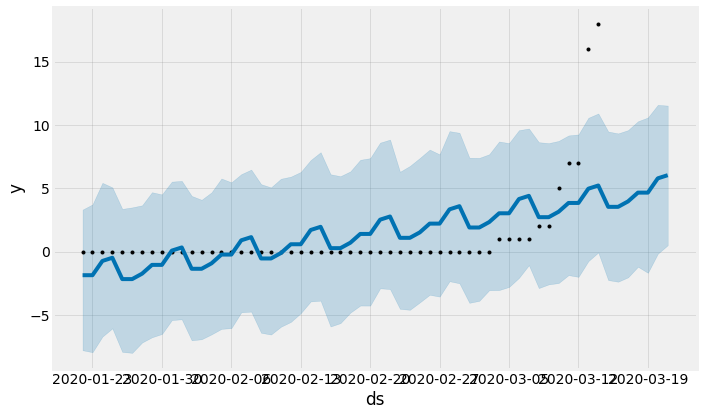

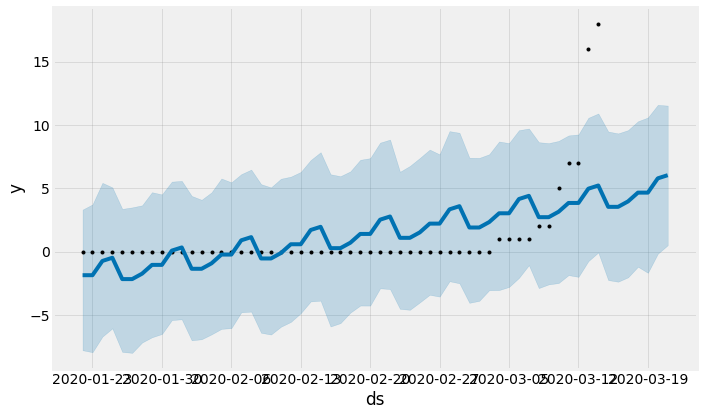

In [317]:
covid_model.plot(forecast, uncertainty = True)

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to overall forecasted values : 

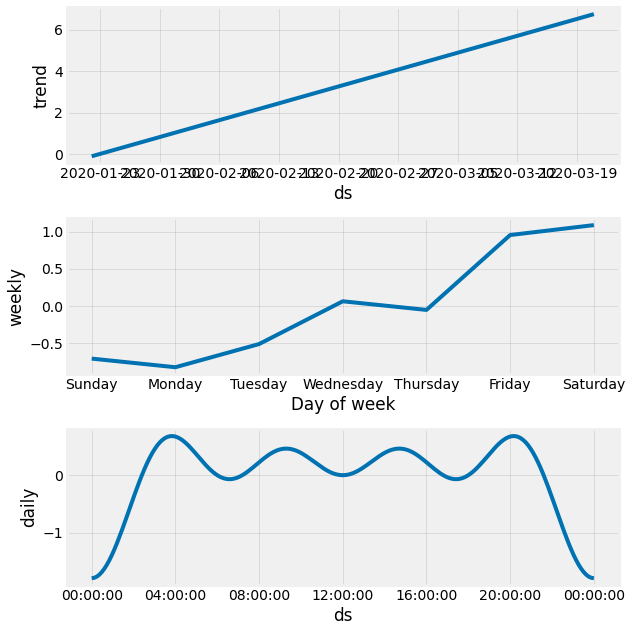

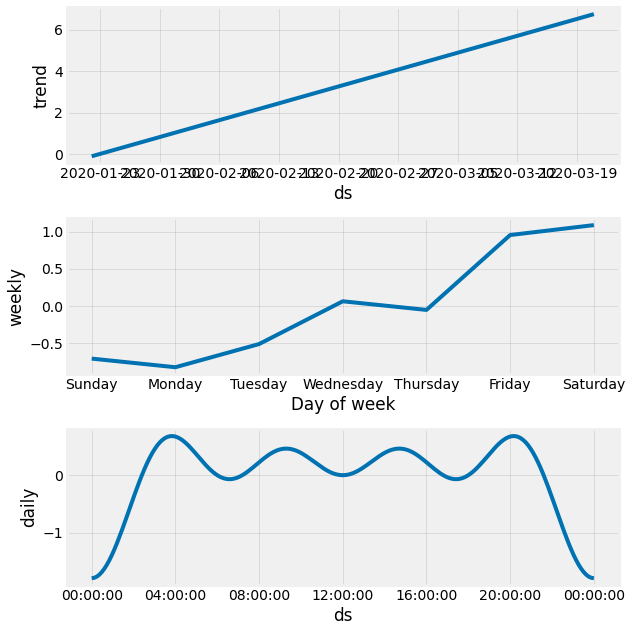

In [318]:
covid_model.plot_components(forecast)

## Cross Validation
 
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

- horizon the forecast horizon
- initial the size of the initial training period
- period the spacing between cutoff dates
The output of the cross_validation method is a dataframe containing y the true values and yhat the predicted values. We’ll use this dataframe to compute the prediction errors.

In [319]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(covid_model, initial='40 days', period='7 days', horizon = '10 days')
df_cv.head()



INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-03-04 00:00:00 and 2020-03-04 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-05,0.078932,-0.186436,0.350119,1,2020-03-04
1,2020-03-06,0.078927,-0.181101,0.332800,1,2020-03-04
2,2020-03-07,0.078922,-0.195752,0.343261,1,2020-03-04
3,2020-03-08,0.078917,-0.174179,0.325988,2,2020-03-04
4,2020-03-09,0.078912,-0.193811,0.330017,2,2020-03-04


## Obtaining the Performance Metrics
 
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates

In [320]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,0.848367,0.921068,0.921068,0.921068,0.921068,0.0
1,2 days,0.848376,0.921073,0.921073,0.921073,0.921073,0.0
2,3 days,0.848385,0.921078,0.921078,0.921078,0.921078,0.0
3,4 days,3.690560,1.921083,1.921083,0.960542,0.960542,0.0
4,5 days,3.690579,1.921088,1.921088,0.960544,0.960544,0.0


## Visualizing Performance Metrics
 
The performance Metrics can be visualized using the plot_cross_validation_metric utility. Let’s visualize the RMSE below.

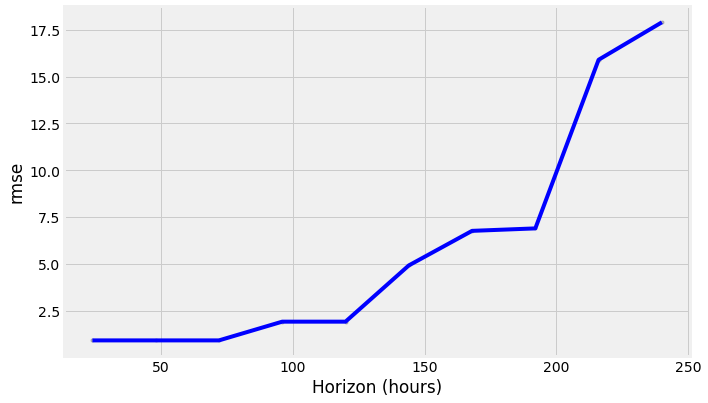

In [321]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')